In [4]:
%matplotlib inline

In [5]:
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.assets._assets import Future
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

# Set-Up Pricing Data Access
trading_calendar = get_calendar('CME')
bundle = 'futures'
bundle_data = bundles.load(bundle)

data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)

fut = bundle_data.asset_finder.retrieve_futures_contracts([0])[0]

end_dt = pd.Timestamp('2018-01-05', tz='UTC', offset='C')
start_dt = pd.Timestamp('2018-01-02', tz='UTC', offset='C')
    
end_loc = trading_calendar.closes.index.get_loc(end_dt)

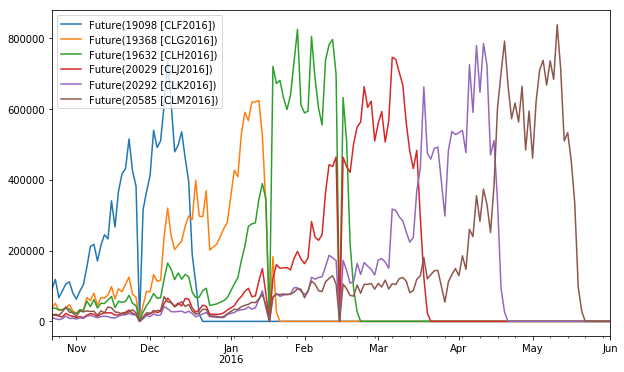

In [7]:
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data.get_history_window

cl_contracts = [
    bundle_data.asset_finder.lookup_future_symbol(x) 
    for x
    in ['CLF2016', 'CLG2016', 'CLH2016', 'CLJ2016', 'CLK2016', 'CLM2016']
]

start_dt = pd.Timestamp('2015-10-21', tz='UTC', offset='C')
end_dt = pd.Timestamp('2016-06-01', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
cl_consecutive_contract_volume = history(
    assets=cl_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

cl_consecutive_contract_volume.plot(figsize=(10,6));

In [16]:
cl =  bundle_data.asset_finder.lookup_future_symbol(33) 
cl_consecutive_contract_contract = history(
    assets=cl_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='contract',
    data_frequency='daily'
)

SymbolNotFound: Symbol '33' was not found.

In [12]:
continuous_future

<bound method AssetFinder.create_continuous_future of <zipline.assets.assets.AssetFinder object at 0x000001E0BB76ECC0>>

In [14]:
continuous_future('cl', 0, 'volume', 'add')

SymbolNotFound: Symbol 'cl' was not found.

In [9]:
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
dat = data.get_history_window(
    assets=[fut],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='close',
    data_frequency='daily'
)

In [10]:
dat

,Future(0 [SU1959])
2015-10-22 00:00:00+00:00,NaN
2015-10-23 00:00:00+00:00,NaN
2015-10-26 00:00:00+00:00,NaN
2015-10-27 00:00:00+00:00,NaN
2015-10-28 00:00:00+00:00,NaN
2015-10-29 00:00:00+00:00,NaN
2015-10-30 00:00:00+00:00,NaN
2015-11-02 00:00:00+00:00,NaN
2015-11-03 00:00:00+00:00,NaN
2015-11-04 00:00:00+00:00,NaN
